# Indicizzazione

Come sappiamo ci sono diversi modi per accedere agli elementi di una lista python, ad esempio

- `L[4]` per acccedere ad un elemento specifico
- `L[-2]` stessa cosa ma partendo dalla fine
- `L[1:3]` un segmento della lista (l'elemento in posizione 3 è escluso)
- `L[2:11:3]` elementi in pos. 2, 5, 8 
- `L[::-1]` elementi in sequenza inversa

e abbiamo visto che queste indicizzazioni possono essere usate **per copiare** il contenuto della lista, o per **modificarne** una parte.

Gli array multidimensionali di `numpy` permettono di accedere agli elementi in vari modi, ma la forma base è quella per cui un'elemento dell'array è selezionato tramite una tupla di indici, ovvero una serie di indici separati da una virgola.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[[1,2,6],[-3,4,7]],[[1,2,6],[-3,4,7]]])
A[1,0,1]

2

Se poi gli indici passati nella tupla sono in quantità minore delle dimensioni dell'array, si otterrà un sotto-array.

In [63]:
print("Specifico un indice, ottengo un array 2-dimensionale")
print(A[1])
print("Specifico due indici, ottengo un array 1-dimensionale")
print(A[0,1])

Specifico un indice, ottengo un array 2-dimensionale
[[ 1  2  6]
 [-3  4  7]]
Specifico due indici, ottengo un array 1-dimensionale
[-3  4  7]


Tuttavia esistono molti altri modi per selezionare sotto-parti dell'array. Ad esempio
- `A[0,:,2::3]` indicizzazione e slicing lungo una o più coordinate
- `A[[1,5,2,8]]` selezione di posizioni specifiche (1-dimensionale)
- `A[ [[True,False],[False,True]] ]` selezione di valori attraverso booleani

L'indicizzazione usando le slice permette di **modificare** ma anche di ottenere una **vista** si una sottomatrice, senza produrne una copia.

L'indicizzazione attraverso la selezione di posizioni specifiche, o via booleani, permette di **modificare** l'array, ma anche di ottenere una **copia 1-dimensionale** delle posizioni scelte.

## Slicing multi-dimensionale

È possibile effettuare uno slicing simultaneo lungo ogni dimensione.

In [4]:
def f(r, c): 
    return r + 10 * c
    
A = np.fromfunction(f, (6, 6), dtype=int)

In [5]:
A

array([[ 0, 10, 20, 30, 40, 50],
       [ 1, 11, 21, 31, 41, 51],
       [ 2, 12, 22, 32, 42, 52],
       [ 3, 13, 23, 33, 43, 53],
       [ 4, 14, 24, 34, 44, 54],
       [ 5, 15, 25, 35, 45, 55]])

In [95]:
A[:3,:3]  # alto a sinistra

array([[ 0, 10, 20],
       [ 1, 11, 21],
       [ 2, 12, 22]])

In [96]:
A[::2,:4] # righe pari, prime 4 colonne

array([[ 0, 10, 20, 30],
       [ 2, 12, 22, 32],
       [ 4, 14, 24, 34]])

In [97]:
A[3,:] # riga 3

array([ 3, 13, 23, 33, 43, 53])

In [98]:
A[:,2] # colonna 2

array([20, 21, 22, 23, 24, 25])

In [99]:
A[:,1::2] # colonne 1,3,5

array([[10, 30, 50],
       [11, 31, 51],
       [12, 32, 52],
       [13, 33, 53],
       [14, 34, 54],
       [15, 35, 55]])

### Assegnamento e slicing

È possibile assegnare dei valori alla parte di matrice selezionata, assumendo che le dimensioni della parte assegnata siano compatibili con quelle della parte che riceve i valori. Non deve essere necessariamente uguale, ma deve essere **compatibile**, vedi [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

In [100]:
A = np.ones((5,6))
B = np.zeros((4,4))

In [101]:
A

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [102]:
B

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [103]:
A[1:,2:] = B

In [104]:
A

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.]])

In [105]:
A[2:4,2:] = 3

In [106]:
A

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 3., 3., 3., 3.],
       [1., 1., 3., 3., 3., 3.],
       [1., 1., 0., 0., 0., 0.]])

## Lo slicing produce una "vista" sugli stessi dati

Quando selezioniamo una porzione di matrice attraverso lo slicing non viene prodotta una copia dei dati selezionati, come invece accade **con lo slicing di liste python**. Invece in `numpy` viene prodotto un array che fornisce una vista degli stessi dati, contenuti in quella porzione.

In [158]:
A = np.ones((5,6),'int64')

B = A[3:,:5]
B

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [159]:
B[0,3] = 3

In [160]:
A

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 3, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [161]:
B *= 5

In [162]:
A

array([[ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 5,  5,  5, 15,  5,  1],
       [ 5,  5,  5,  5,  5,  1]])

Se si vuole una copia si può sempre usare il metodo `copy`.

In [170]:
C = A[:2,:2].copy()
C[1,:] = 7
C

array([[1, 1],
       [7, 7]])

In [171]:
A

array([[ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 5,  5,  5, 15,  5,  1],
       [ 5,  5,  5,  5,  5,  1]])

## Selezione di posizioni tramite indici o booleani

Esiste un modo più preciso di selezionare elementi. Cominciamo con il caso **1-dimensionale**, dove è possibile scegliere ad uno ad uno gli elementi dell'array indicando
- un valore vero/falso per ogni posizione dell'array;
- oppure l'elenco di posizioni scelte.

In [6]:
A = np.arange(0,68,7)
A

array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63])

In [9]:
B = A[[3,5,1,4]]

In [10]:
B

array([21, 35,  7, 28])

Abbiamo selezionato gli elementi alle posizioni 3, 5, 1, e 4 in quest'ordine. `B` non è una vista, è una copia.

In [14]:
B[2] = 1000
A

array([ 0,  3, 14, 21, 28,  3,  3, 49, 56, 63])

In [15]:
A[[1,5,6]]=3  # Modifichiamo una selezione dei valori

In [16]:
A

array([ 0,  3, 14, 21, 28,  3,  3, 49, 56, 63])

In [131]:
A[[6,8]] = [100,200]

In [132]:
A

array([  0,   3,  14,  21,  28,   3, 100,  49, 200,  63])

Adesso vediamo come si possono fare le stesse operazioni usando la selezione posizione per posizione con i booleani.

In [148]:
A = np.arange(0,68,7)
A

array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63])

In [149]:
B = A[[False,True,False,True,True,True,False,False,False,False]]

In [150]:
B

array([ 7, 21, 28, 35])

Abbiamo selezionato gli elementi alle posizioni 1, 3, 4, e 5. L'ordine è forzato, in questo caso.

In [153]:
A[[False,True,False,False,False,True,True,False,False,False]] = 3

In [154]:
A

array([ 0,  3, 14, 21, 28,  3,  3, 49, 56, 63])

In [155]:
A[[False,False,False,False,False,False,True,False,True,False]] = [100,200]

In [156]:
A

array([  0,   3,  14,  21,  28,   3, 100,  49, 200,  63])

## La selezione per indici o per booleani copia i dati

Al contrario dello slicing, questo tipo di selezione non produce una vista, ma una nuova copia dei dati.

In [172]:
A = np.arange(0,68,7)
A

array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63])

In [179]:
B = A[[1,3,5]]

In [180]:
B

array([ 7, 21, 35])

In [181]:
B *= 10

In [182]:
B

array([ 70, 210, 350])

In [183]:
A

array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63])

## Esempi di possibili combinazioni

Combiniamo assieme questo tipo di indicizzazioni e vediamo degli esempi. Per ogni esempio costruiamo una matrice di zeri e assegnamo ad 1 le coordinate selezionate. In questo modo sarà semplice visualizzarle graficamente.

In [204]:
A = np.zeros((4,4))

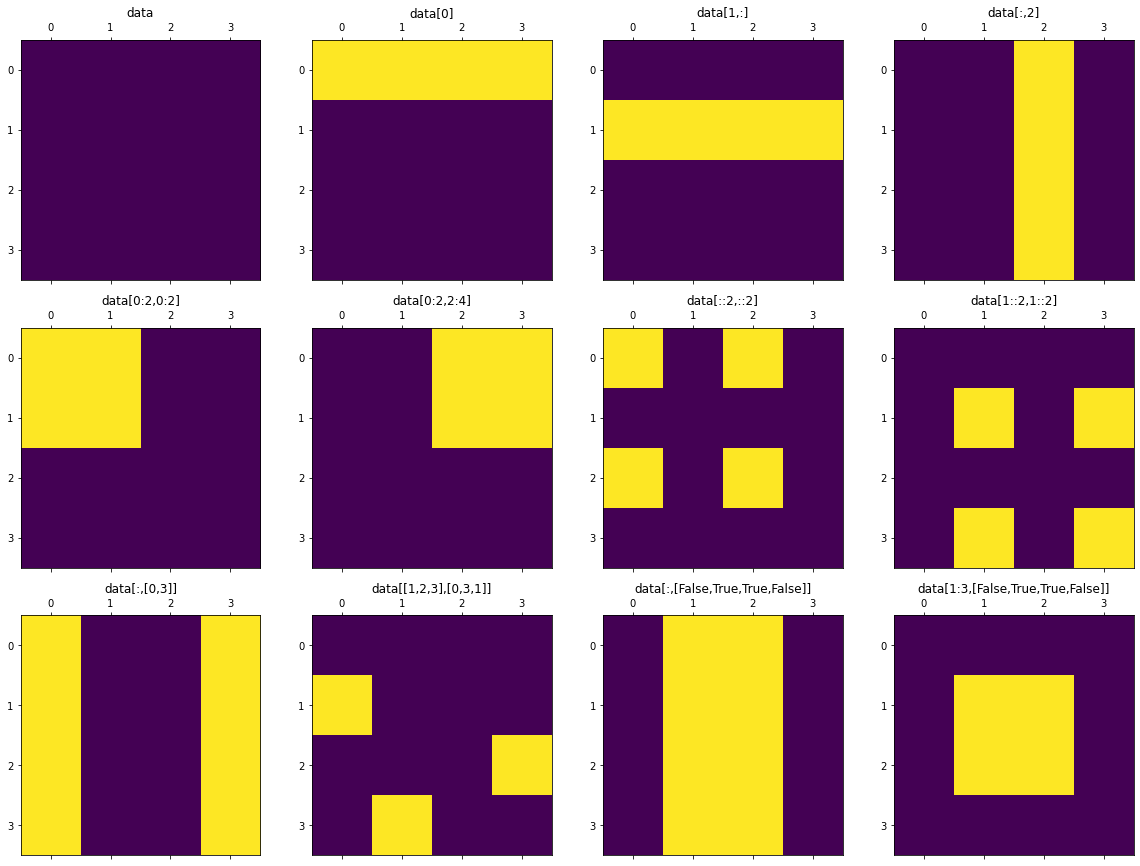

In [240]:
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(20,15))
def vignetta(ax,M,label):
    ax.matshow(M)
    ax.set_title(label)
    
# top left
A = np.zeros((4,4))
vignetta(ax[0,0],A,"data")

B = A.copy()
B[0] = 1
vignetta(ax[0,1],B,"data[0]")

B = A.copy()
B[1,:] = 1
vignetta(ax[0,2],B,"data[1,:]")

B = A.copy()
B[:,2] = 1
vignetta(ax[0,3],B,"data[:,2]")

# second row
B = A.copy()
B[0:2,0:2] = 1
vignetta(ax[1,0],B,"data[0:2,0:2]")

B = A.copy()
B[0:2,2:4] = 1
vignetta(ax[1,1],B,"data[0:2,2:4]")

B = A.copy()
B[::2,::2] = 1
vignetta(ax[1,2],B,"data[::2,::2]")

B = A.copy()
B[1::2,1::2] = 1
vignetta(ax[1,3],B,"data[1::2,1::2]")

# third row
B = A.copy()
B[:,[0,3]] = 1
vignetta(ax[2,0],B,"data[:,[0,3]]")

B = A.copy()
B[[1,2,3],[0,3,1]] = 1
vignetta(ax[2,1],B,"data[[1,2,3],[0,3,1]]")

B = A.copy()
B[:,[False,True,True,False]] = 1
vignetta(ax[2,2],B,"data[:,[False,True,True,False]]")

B = A.copy()
B[1:3,[False,True,True,False]] = 1
vignetta(ax[2,3],B,"data[1:3,[False,True,True,False]]")


## Filtraggio di elementi

Abbiamo visto come utilizzare l'indicizzazione booleana su un asse dimensionale dell'array (ad esempio per selezionare righe e/o colonne in una matrice). È però possibile selezionare elemento per elemento, utilizzando un array booleano **delle stesse dimensioni** di quello da filtrare. 


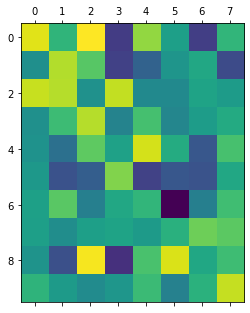

In [22]:
A = np.random.randn(10,8)
plt.matshow(A)

In [23]:
A >= 0   # una matrice di booleani

array([[ True,  True,  True, False,  True,  True, False,  True],
       [False,  True,  True, False, False, False,  True, False],
       [ True,  True, False,  True, False, False,  True,  True],
       [False,  True,  True, False,  True, False,  True,  True],
       [False, False,  True,  True,  True,  True, False,  True],
       [False, False, False,  True, False, False, False,  True],
       [ True,  True, False,  True,  True, False, False,  True],
       [ True, False,  True,  True, False,  True,  True,  True],
       [False, False,  True, False,  True,  True,  True,  True],
       [ True, False, False, False,  True, False,  True,  True]])

In [24]:
B = (A >= 0)

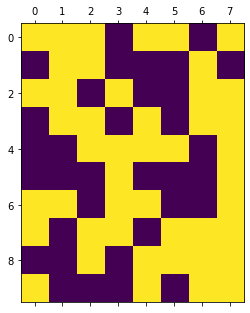

In [25]:
plt.matshow(B)

Vedete bene che gli elementi selezionati non formano una sottomatrice. Possiamo usare la matrice `B` per selezionare dei valori da `A`.

In [246]:
A[B]

array([0.07342511, 1.70669239, 0.33897268, 0.40554781, 0.23841046,
       1.29807448, 0.6172429 , 0.27321071, 1.51869765, 0.03079087,
       0.51352595, 0.25243697, 0.4895966 , 0.88733414, 2.10985712,
       0.24567013, 0.99089348, 0.74586387, 0.20151302, 0.14123789,
       0.89285661, 0.82602322, 0.18730076, 0.62843127, 0.27747785,
       1.102337  , 0.20036747, 0.53716588, 0.39306617, 0.31255051,
       0.09717657, 0.64915236, 2.32625732, 0.40750183, 0.20077785,
       0.8131992 , 1.14958573, 0.82926819, 1.09740614, 1.53025176,
       0.98522173, 0.19776084, 1.11461458, 0.55355505, 1.63333133,
       1.38717624, 0.46887028, 1.33513825, 0.26275903, 1.63776713,
       0.10671331, 1.33827672, 0.68710401, 0.29680782])

Oppure possiamo modificare i valori con un assegnamento.

In [249]:
A[B] = 5

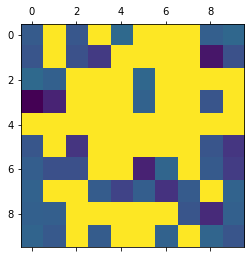

In [250]:
plt.matshow(A)